In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from itertools import product
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load dataset 10

In [2]:
# Define the data types as a dictionary
dtypes = {
    'census_tract': 'float32',
    'action_taken': 'int32',
    'loan_type': 'int32',
    'lien_status': 'int32',
    'open_end_line_of_credit': 'int32',
    'loan_amount': 'int32',
    'combined_loan_to_value_ratio': 'int32',
    'interest_rate': 'float32',
    'total_loan_costs': 'int32',
    'origination_charges': 'int32',
    'loan_term': 'int32',
    'negative_amortization': 'int32',
    'interest_only_payment': 'int32',
    'balloon_payment': 'int32',
    'other_nonamortizing_features': 'int32',
    'property_value': 'float32',
    'occupancy_type': 'int32',
    'manufactured_home_secured_property_type': 'int32',
    'manufactured_home_land_property_interest': 'int32',
    'total_units': 'int32',
    'income': 'float32',
    'debt_to_income_ratio': 'int32',
    'applicant_credit_score_type': 'int32',
    'co_applicant_credit_score_type': 'int32',
    'applicant_sex': 'int32',
    'co_applicant_sex': 'int32',
    'applicant_age': 'int32',
    'co_applicant_age': 'int32',
    'applicant_race_1': 'float32',
    'applicant_race_2': 'float32',
    'co_applicant_race_1': 'float32',
    'co_applicant_race_2': 'float32',
    'applicant_ethnicity_1': 'float32',
    'co_applicant_ethnicity_1': 'float32'
}

In [3]:
# Read the CSV file with specified data types
df = pd.read_csv('10_all_numerical_32bit.csv', dtype=dtypes, low_memory=False)

# Drop the column you want to exclude
column_to_exclude = 'reverse_mortgage'
if column_to_exclude in df:
    df.drop(column_to_exclude, axis=1, inplace=True)

# Convert the data types of the remaining columns as needed
df = df.astype(dtypes)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49670 entries, 0 to 49669
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_tract                              49670 non-null  float32
 1   action_taken                              49670 non-null  int32  
 2   loan_type                                 49670 non-null  int32  
 3   lien_status                               49670 non-null  int32  
 4   open_end_line_of_credit                   49670 non-null  int32  
 5   loan_amount                               49670 non-null  int32  
 6   combined_loan_to_value_ratio              49670 non-null  int32  
 7   interest_rate                             49670 non-null  float32
 8   total_loan_costs                          49670 non-null  int32  
 9   origination_charges                       49670 non-null  int32  
 10  loan_term                         

In [5]:
df.head()

,census_tract,action_taken,loan_type,lien_status,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_sex,co_applicant_sex,applicant_age,co_applicant_age
0,4.201710e+10,3,3,1,2,205000,16,5.0,7,1,...,2.0,2.0,5.0,5.0,5.0,5.0,1,2,7,4
1,4.843912e+10,3,2,1,2,155000,7,5.0,7,1,...,2.0,2.0,5.0,5.0,5.0,5.0,2,1,3,3
2,1.703700e+10,3,2,1,2,125000,8,5.0,7,1,...,2.0,2.0,5.0,5.0,5.0,5.0,1,2,4,3
3,4.500700e+10,3,2,1,2,55000,7,5.0,7,1,...,2.0,2.0,3.0,5.0,3.0,5.0,1,2,2,2
4,4.201710e+10,3,1,1,2,345000,1,5.0,7,1,...,2.0,2.0,5.0,5.0,5.0,5.0,1,2,2,2


In [6]:
target_variable = "action_taken"

In [7]:
X = df.drop(columns=[target_variable])
y = df[target_variable]

In [8]:
print(X.shape, y.shape)

(49670, 33) (49670,)


In [9]:
seed = 123

In [10]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 3, random_state=seed)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv)

print('Mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X, y)

y_pred = model.predict(X)

Mean accuracy: 0.563 (0.000)


In [11]:
accuracy = accuracy_score(y, y_pred)

print(classification_report(y, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.56      1.00      0.72     27966
           3       0.00      0.00      0.00     21704

    accuracy                           0.56     49670
   macro avg       0.28      0.50      0.36     49670
weighted avg       0.32      0.56      0.41     49670



- for _class 1, precision is 0.80_, which means that _80%_ of the predictions for class 1 were correct, 
- and for _class 3, it's 0.00_, which means that _none_ of the predictions for class 3 were correct.

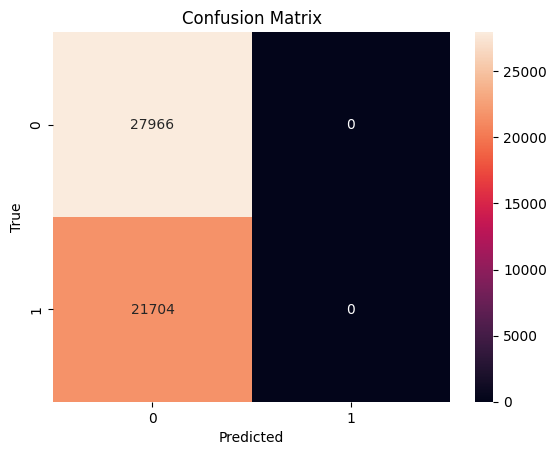

In [12]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

The model cant predict class 1!